In [103]:
from xd import *
from utils import *
import esutil
import healpy as hp
from systematics import *
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
# calling map 
GoldMask = callingEliGoldMask()
GoldMask_st82 = Cuts.SpatialCuts(GoldMask, ra=320, ra2=360, dec=-2, dec2=2)
GoldMask_spt = GoldMask[ GoldMask['DEC'] < -3.0 ]

pixarea = hp.nside2pixarea( 4096, degrees = True)
sptnpix = GoldMask_spt['PIXEL'].size #hp.get_map_size( GoldMask_spt['PIXEL'] )
st82npix =  GoldMask_st82['PIXEL'].size # hp.get_map_size( GoldMask_st82 )
SPTMaparea = pixarea * sptnpix
ST82Maparea = pixarea * st82npix

Spatial Cut  529721


In [80]:
# sgc data
import esutil
import numpy as np

path = '/n/des/lee.5922/data/cmass_cat/'

cmass_sgc = esutil.io.read(path+'galaxy_DR12v5_CMASS_South.fits.gz')
cmass_sgc_low = cmass_sgc[(cmass_sgc['Z'] < 0.55)]
cmass_sgc_high = cmass_sgc[(cmass_sgc['Z'] >= 0.55)]

random_sgc = esutil.io.read(path+'random0_DR12v5_CMASS_South.fits.gz')
random_sgc_low = random_sgc[(random_sgc['Z'] < 0.55)]
random_sgc_high = random_sgc[(random_sgc['Z'] >= 0.55)]

In [19]:
cmass_st82 = Cuts.keepGoodRegion(cmass_sgc)
cmass_st82_low = cmass_st82[(cmass_st82['Z'] < 0.55)]
cmass_st82_high = cmass_st82[(cmass_st82['Z'] > 0.55)]

In [145]:
dmass_spt = esutil.io.read('result_cat/dmass_spt.fits')

In [ ]:
ls /n/des/lee.5922/data/

In [16]:
from cmass_modules.io import getCatalogsWithKeys
gold_st82 = getCatalogsWithKeys(keyword = 'Y1A1_GOLD_STRIPE82_v2', path = '/n/des/lee.5922/data/gold_cat/')

Y1A1_GOLD_STRIPE82_v2_000001.fits
Y1A1_GOLD_STRIPE82_v2_000002.fits
Y1A1_GOLD_STRIPE82_v2_000003.fits
Y1A1_GOLD_STRIPE82_v2_000004.fits
Y1A1_GOLD_STRIPE82_v2_000005.fits
Y1A1_GOLD_STRIPE82_v2_000006.fits
Y1A1_GOLD_STRIPE82_v2_000007.fits
Y1A1_GOLD_STRIPE82_v2_000008.fits
reading 1/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000001.fits
reading 2/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000002.fits
reading 3/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000003.fits
reading 4/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000004.fits
reading 5/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000005.fits
reading 6/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000006.fits
reading 7/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000007.fits
reading 8/8 /n/des/lee.5922/data/gold_cat/Y1A1_GOLD_STRIPE82_v2_000008.fits


In [20]:
m1, m2, _ = esutil.htm.HTM(10).match(cmass_st82_low['RA'], cmass_st82_low['DEC'], gold_st82['RA'], \
                                     gold_st82['DEC'], 2./3600, maxmatch=1)
cmass_mask_low = np.zeros(gold_st82.size, dtype=bool)
cmass_mask_low[m2] = 1
cmass_in_des_low = gold_st82[cmass_mask_low]

m1, m2, _ = esutil.htm.HTM(10).match(cmass_st82_high['RA'], cmass_st82_high['DEC'], gold_st82['RA'], \
                                     gold_st82['DEC'], 2./3600, maxmatch=1)
cmass_mask_high = np.zeros(gold_st82.size, dtype=bool)
cmass_mask_high[m2] = 1
cmass_in_des_high = gold_st82[cmass_mask_high]

In [67]:
dmass_spt = esutil.io.read('result_cat/dmass_spt_30.fits')

In [90]:
dmass_st82_low = esutil.io.read('result_cat/dmass_st82_z0_055.fits')
dmass_st82_high = esutil.io.read('result_cat/dmass_st82_z055_10.fits')

dmass_spt_low = esutil.io.read('result_cat/dmass_spt_z0_055.fits')
dmass_spt_high = esutil.io.read('result_cat/dmass_spt_z055_10.fits')

In [ ]:
dmass_spt = esutil.io.read('result_cat/dmass_')

saving fig to  figure/hist_z_low.png
saving fig to  figure/hist_z_high.png


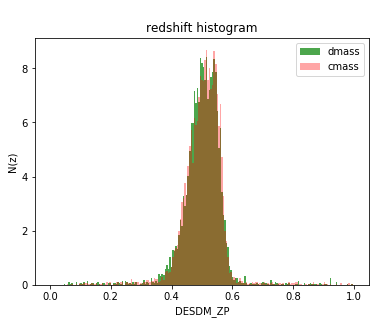

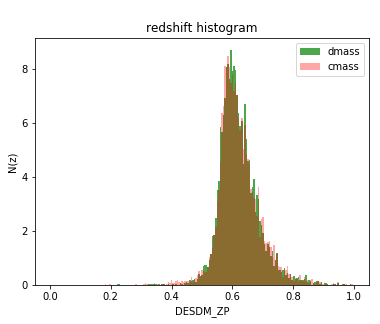

In [51]:
doVisualization_z([dmass_st82_low, cmass_in_des_low], zlabel='DESDM_ZP', suffix='low', labels = ['dmass', 'cmass'])
doVisualization_z([dmass_st82_high, cmass_in_des_high], zlabel='DESDM_ZP', suffix = 'high',labels = ['dmass', 'cmass'])

In [148]:
dmass_spt_low.shape, dmass_spt_high.shape

((51115,), (64395,))

saving fig to  figure/hist_z_.png


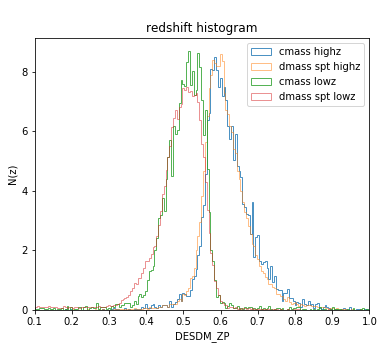

In [138]:
doVisualization_z_1([cmass_in_des_high, dmass_spt_low, cmass_in_des_low, dmass_spt_high], zlabel='DESDM_ZP', 
                    suffix = '',labels = ['cmass highz', 'dmass spt highz', 'cmass lowz', 'dmass spt lowz'])

In [119]:
def ra_dec_to_xyz(ra, dec):
    """Convert ra & dec to Euclidean points
    Parameters
    ----------
    ra, dec : ndarrays
    Returns
    x, y, z : ndarrays
    """
    sin_ra = np.sin(ra * np.pi / 180.)
    cos_ra = np.cos(ra * np.pi / 180.)

    sin_dec = np.sin(np.pi / 2 - dec * np.pi / 180.)
    cos_dec = np.cos(np.pi / 2 - dec * np.pi / 180.)

    return (cos_ra * sin_dec,
            sin_ra * sin_dec,
            cos_dec)

def uniform_sphere(RAlim, DEClim, size=1):
    """Draw a uniform sample on a sphere
    Parameters
    ----------
    RAlim : tuple
        select Right Ascension between RAlim[0] and RAlim[1]
        units are degrees
    DEClim : tuple
        select Declination between DEClim[0] and DEClim[1]
    size : int (optional)
        the size of the random arrays to return (default = 1)
    Returns
    -------
    RA, DEC : ndarray
        the random sample on the sphere within the given limits.
        arrays have shape equal to size.
    """
    zlim = np.sin(np.pi * np.asarray(DEClim) / 180.)

    z = zlim[0] + (zlim[1] - zlim[0]) * np.random.random(size)
    DEC = (180. / np.pi) * np.arcsin(z)
    RA = RAlim[0] + (RAlim[1] - RAlim[0]) * np.random.random(size)
    
    return RA, DEC

def uniform_random_on_sphere(data, size = None, zlabel = 'DESDM_ZP' ):
    ra = data['RA']
    dec = data['DEC']
    
    n_features = ra.size
    #size = 100 * data.size
    
    # draw a random sample with N points
    ra_R, dec_R = uniform_sphere((min(ra), max(ra)),
                                 (min(dec), max(dec)),
                                 size)
    #data = np.asarray(ra_dec_to_xyz(ra, dec), order='F').T
    #data_R = np.asarray(ra_dec_to_xyz(ra_R, dec_R), order='F').T
    
    #random redshift distribution
    mu, sigma = np.mean(data[zlabel]), np.std(data[zlabel])
    z_R = np.random.normal(mu, sigma, size)
    
    data_R = np.zeros((ra_R.size,), dtype=[('RA', 'float'), ('DEC', 'float'), (zlabel, 'float')])
    data_R['RA'] = ra_R
    data_R['DEC'] = dec_R
    data_R[zlabel] = z_R
                              
    return data_R

In [69]:
dmass = np.hstack([dmass_st82_low, dmass_st82_high])
data_R = uniform_random_on_sphere(dmass, size = 50 * dmass.size)
data_R = Cuts.keepGoodRegion(data_R)
data_R_t = uniform_random_on_sphere(cmass_st82, size = 50 * cmass_st82.size, zlabel='Z')
data_R_t = Cuts.keepGoodRegion(data_R_t)

In [70]:
data_R_spt = uniform_random_on_sphere(dmass_spt, size = 50 * dmass_spt.size)
data_R_spt = Cuts.keepGoodRegion(data_R_spt)
data_R_spt = data_R_spt[data_R_spt['DEC']<-3]

In [71]:
from systematics_module.corr import angular_correlation
angular_correlation(data = dmass_st82_low, rand = data_R, weight = None, suffix = '_dmass_st82_low', njack=10)
angular_correlation(data = cmass_st82_low, rand = data_R_t, weight = None, suffix = '_cmass_st82_low', njack=10)


calculate angular correlation function
X (160, 2)  centers (10, 2)  tol=1e-05  maxiter=200
12 iterations  cluster sizes: [20 28 15 15 13 17 12  9 13 18]
X (6458, 2)  centers (10, 2)  tol=1e-05  maxiter=200
32 iterations  cluster sizes: [627 752 498 631 530 658 610 716 704 732]
saving data file to :  data_txt/acf_comparison_dmass_st82_low.txt
calculate angular correlation function
X (161, 2)  centers (10, 2)  tol=1e-05  maxiter=200
21 iterations  cluster sizes: [12 18 16 14  3 16  8 38 16 20]
X (6507, 2)  centers (10, 2)  tol=1e-05  maxiter=200
25 iterations  cluster sizes: [ 615  746  579  692  454  622  550 1136  602  511]
saving data file to :  data_txt/acf_comparison_cmass_st82_low.txt


0

In [72]:
from systematics_module.corr import angular_correlation
angular_correlation(data = dmass_st82_high, rand = data_R, weight = None, suffix = '_dmass_st82_high', njack=10)
angular_correlation(data = cmass_st82_high, rand = data_R_t, weight = None, suffix = '_cmass_st82_high', njack=10)

calculate angular correlation function
X (148, 2)  centers (10, 2)  tol=1e-05  maxiter=200
8 iterations  cluster sizes: [15 11  7 18 20  4 13  7 35 18]
X (5516, 2)  centers (10, 2)  tol=1e-05  maxiter=200
30 iterations  cluster sizes: [734 422 548 503 666 367 615 523 665 473]
saving data file to :  data_txt/acf_comparison_dmass_st82_high.txt
calculate angular correlation function
X (146, 2)  centers (10, 2)  tol=1e-05  maxiter=200
6 iterations  cluster sizes: [19 15  7 17 30 14 19 13  5  7]
X (5401, 2)  centers (10, 2)  tol=1e-05  maxiter=200
20 iterations  cluster sizes: [367 307 369 659 929 516 644 732 431 447]
saving data file to :  data_txt/acf_comparison_cmass_st82_high.txt


0

In [140]:
angular_correlation(data = dmass_spt_high, rand = GoldMask_spt, weight = None, suffix = '_dmass_spt_low', njack=10)
angular_correlation(data = dmass_spt_low, rand = GoldMask_spt, weight = None, suffix = '_dmass_spt_high', njack=10)


calculate angular correlation function
X (507, 2)  centers (10, 2)  tol=1e-05  maxiter=200
37 iterations  cluster sizes: [45 91 36 34 31 26 67 89 35 53]
X (64395, 2)  centers (10, 2)  tol=1e-05  maxiter=200
30 iterations  cluster sizes: [7132 8689 7781 3247 3963 4033 7314 8920 4386 8930]
saving data file to :  data_txt/acf_comparison_dmass_spt_low.txt
calculate angular correlation function
X (452, 2)  centers (10, 2)  tol=1e-05  maxiter=200
19 iterations  cluster sizes: [28 81 52 40 40 59 33 46 43 30]
X (51115, 2)  centers (10, 2)  tol=1e-05  maxiter=200
26 iterations  cluster sizes: [4123 6585 4067 4689 4769 5597 3933 4673 6042 6637]
saving data file to :  data_txt/acf_comparison_dmass_spt_high.txt


0

In [146]:
angular_correlation(data = dmass_spt, rand = GoldMask_spt, weight = None, suffix = '_dmass_spt_full', njack=10)


calculate angular correlation function
X (658, 2)  centers (10, 2)  tol=1e-05  maxiter=200
13 iterations  cluster sizes: [63 89 50 79 64 47 56 77 60 73]
X (108324, 2)  centers (10, 2)  tol=1e-05  maxiter=200
22 iterations  cluster sizes: [11108 12654 10131 15277 11194  8145  8444 10045 11045 10281]
saving data file to :  data_txt/acf_comparison_dmass_spt_full.txt


0

In [136]:
w_sgc_low = cmass_sgc_low['WEIGHT_SYSTOT']*( cmass_sgc_low['WEIGHT_CP'] + cmass_sgc_low['WEIGHT_NOZ'] - 1. )
w_rand_low = random_sgc_low['WEIGHT_FKP']

w_sgc_high = cmass_sgc_high['WEIGHT_SYSTOT']*( cmass_sgc_high['WEIGHT_CP'] + cmass_sgc_high['WEIGHT_NOZ'] - 1. )
w_rand_high = random_sgc_high['WEIGHT_FKP']

angular_correlation(data = cmass_sgc_low, rand = random_sgc_low, weight = [w_sgc_low, w_rand_low], suffix = '_cmass_sgc_low', njack=10)
angular_correlation(data = cmass_sgc_high, rand = random_sgc_high, weight = [w_sgc_high, w_rand_high], suffix = '_cmass_sgc_high', njack=10)


calculate angular correlation function
X (709, 2)  centers (10, 2)  tol=1e-05  maxiter=200
21 iterations  cluster sizes: [79 85 62 51 56 83 82 62 83 66]
X (125857, 2)  centers (10, 2)  tol=1e-05  maxiter=200
33 iterations  cluster sizes: [13043 12111 13026 12970 10793 13275 12913 12102 11935 13689]
saving data file to :  data_txt/acf_comparison_cmass_sgc_low.txt
calculate angular correlation function
X (647, 2)  centers (10, 2)  tol=1e-05  maxiter=200
24 iterations  cluster sizes: [95 73 63 54 51 36 81 67 60 67]
X (104974, 2)  centers (10, 2)  tol=1e-05  maxiter=200
70 iterations  cluster sizes: [10364  9987 10936 12200 11303  9880  9229 11156  9856 10063]
saving data file to :  data_txt/acf_comparison_cmass_sgc_high.txt


0

In [147]:
w_sgc = cmass_sgc['WEIGHT_FKP'] * cmass_sgc['WEIGHT_SYSTOT']*( cmass_sgc['WEIGHT_CP'] + cmass_sgc['WEIGHT_NOZ'] - 1. )
w_rand = random_sgc['WEIGHT_FKP']
angular_correlation(data = cmass_sgc, rand = random_sgc, weight = [w_sgc, w_rand], suffix = '_cmass_sgc_full', njack=10)

calculate angular correlation function
X (960, 2)  centers (10, 2)  tol=1e-05  maxiter=200
48 iterations  cluster sizes: [105  86 107  87 105  91 101  99  91  88]
X (230831, 2)  centers (10, 2)  tol=1e-05  maxiter=200
13 iterations  cluster sizes: [25757 23153 19903 24887 23174 23100 23146 22444 23943 21324]
saving data file to :  data_txt/acf_comparison_cmass_sgc_full.txt


0

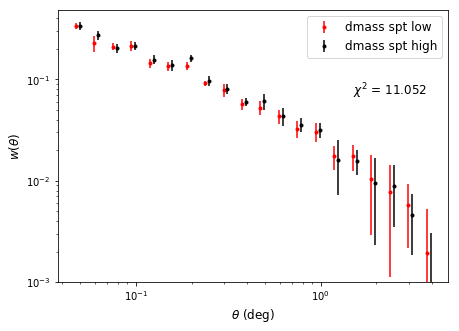

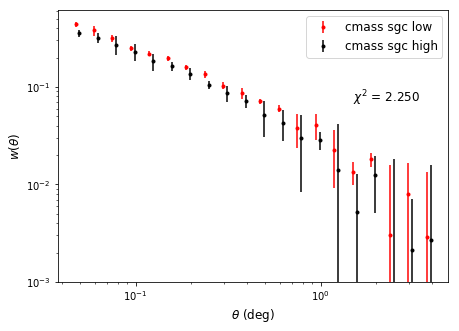

In [144]:

DAT_all = np.loadtxt('data_txt/acf_comparison_dmass_spt.txt')
meanr_all, xi_all, xi_err_all = [DAT_all[:,i] for i in range(3)]


####################################
DAT = np.loadtxt('data_txt/acf_comparison_dmass_spt_low.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]
DAT2 = np.loadtxt('data_txt/acf_comparison_cmass_sgc_low.txt')
meanr2, xi2, xi_err2 = [DAT2[:,i] for i in range(3)]

fig, ax = plt.subplots(figsize = (7, 5))
ax.errorbar(meanr, xi, yerr = xi_err, fmt = '.r', label='dmass spt low')
#ax.errorbar(meanr2, xi2, yerr = xi_err2, fmt = '.k', label='cmass sgc low')
#ax.errorbar(meanr_all, xi_all, yerr = xi_err_all, fmt = '.r', label='dmass spt all')
#ax.errorbar(meanr4, xi4, yerr = xi_err4, fmt = '.k', label='cmass sgc high')
ax.errorbar(meanr3*1.05, xi3, yerr = xi_err3, fmt = '.k', label='dmass spt high')

#ax.errorbar(meanr3*0.95, xi3, yerr = xi_err3, fmt = '.b', label='dmass spt rand')


chisqr = np.sum( (xi2-xi)**2/xi_err**2 )*1./xi.size

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
ax.text(1.5, 0.07, r'$\chi^2$ = {:0.3f}'.format(chisqr), fontsize = 12)
ax.set_ylim(1e-3,)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 12)
ax.set_ylabel(r'$w(\theta)$', fontsize = 12)

#fig.savefig('figure/acf_comparison_cmass_dmass.pdf')

####################################


DAT = np.loadtxt('data_txt/acf_comparison_dmass_spt_high.txt')
meanr3, xi3, xi_err3 = [DAT[:,i] for i in range(3)]
DAT2 = np.loadtxt('data_txt/acf_comparison_cmass_sgc_high.txt')
meanr4, xi4, xi_err4 = [DAT2[:,i] for i in range(3)]

fig, ax = plt.subplots(figsize = (7, 5))
#ax.errorbar(meanr, xi, yerr = xi_err, fmt = '.b', label='dmass spt all')

ax.errorbar(meanr2, xi2, yerr = xi_err2, fmt = '.r', label='cmass sgc low')
#ax.errorbar(meanr*1.05, xi, yerr = xi_err, fmt = '.r', label='dmass spt low')
ax.errorbar(meanr4*1.05, xi4, yerr = xi_err4, fmt = '.k', label='cmass sgc high')
#ax.errorbar(meanr3*1.05, xi3, yerr = xi_err3, fmt = '.r', label='dmass spt high')

#ax.errorbar(meanr3*0.95, xi3, yerr = xi_err3, fmt = '.b', label='dmass spt rand')
chisqr = np.sum( (xi4-xi3)**2/xi_err3**2 )*1./xi3.size

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
ax.text(1.5, 0.07, r'$\chi^2$ = {:0.3f}'.format(chisqr), fontsize = 12)
ax.set_ylim(1e-3,)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 12)
ax.set_ylabel(r'$w(\theta)$', fontsize = 12)

#fig.savefig('figure/acf_comparison_cmass_dmass.pdf')

In [87]:
###############
DAT = np.loadtxt('data_txt/acf_comparison_dmass_spt_high.txt')
meanr, xi, xi_err = [DAT[:,i] for i in range(3)]
DAT2 = np.loadtxt('data_txt/acf_comparison_cmass_sgc_high.txt')
meanr2, xi2, xi_err2 = [DAT2[:,i] for i in range(3)]

fig, ax = plt.subplots(figsize = (7, 5))
ax.errorbar(meanr2, xi2, yerr = xi_err2, fmt = '.k', label='cmass sgc high')
ax.errorbar(meanr*1.05, xi, yerr = xi_err, fmt = '.r', label='dmass spt high')

#ax.errorbar(meanr3*0.95, xi3, yerr = xi_err3, fmt = '.b', label='dmass spt rand')


chisqr = np.sum( (xi-xi2)**2/xi_err**2 )*1./xi.size

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'best', fontsize = 12)
ax.text(1.5, 0.07, r'$\chi^2$ = {:0.3f}'.format(chisqr), fontsize = 12)
ax.set_ylim(1e-3,)
ax.set_xlabel(r'$\theta$ (deg)', fontsize = 12)
ax.set_ylabel(r'$w(\theta)$', fontsize = 12)

#fig.savefig('figure/acf_comparison_cmass_dmass.pdf')

IOError: [Errno 2] No such file or directory: 'data_txt/acf_comparison_dmass_spt_high.txt'